In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', None)
df = pd.read_csv("../Data/eda_newData.csv")

In [4]:
df

Month  Day Time (LST)  Temp (°C)  Dew Point Temp (°C)  Rel Hum (%)  \
0         1    1     hour_0        3.0                  3.0        100.0   
1         1    1     hour_1        3.0                  3.0        100.0   
2         1    1     hour_2        3.0                  3.0        100.0   
3         1    1     hour_3        2.6                  2.6        100.0   
4         1    1     hour_4        2.4                  2.4        100.0   
...     ...  ...        ...        ...                  ...          ...   
8751     12   31    hour_19       -6.7                -10.3         76.0   
8752     12   31    hour_20       -6.6                -10.2         76.0   
8753     12   31    hour_21       -8.0                -10.9         80.0   
8754     12   31    hour_22       -7.5                -10.1         82.0   
8755     12   31    hour_23       -6.7                -10.2         76.0   

      Wind Dir (10s deg)  Wind Spd (km/h)  Visibility (km)  Stn Press (kPa)  \
0                   28.0             11.0              0.4            99.11   
1                   26.0             10.0              0.4            99.16   
2                   30.0             21.0              6.4            99.22   
3                   28.0             24.0              8.1            99.27   
4                   28.0             23.0             11.3            99.33   
...                  ...              ...              ...              ...   
8751                26.0              5.0             24.1           100.37   
8752                30.0              7.0             24.1           100.35   
8753                28.0              8.0             24.1           100.37   
8754                29.0              7.0             24.1           100.38   
8755                35.0             10.0             24.1           100.41   

      Hmdx  Wind Chill        Weather  Meter Reading (KWHr)  Freezing Drizzle  \
0     28.0        -6.0            Fog               350.991                 0   
1     28.0        -6.0            Fog               352.707                 0   
2     28.0        -6.0            Fog               349.177                 0   
3     28.0        -6.0            Fog               349.923                 0   
4     28.0        -6.0         Cloudy               351.596                 0   
...    ...         ...            ...                   ...               ...   
8751  28.0        -9.0  Mostly Cloudy               422.618                 0   
8752  28.0       -10.0  Mostly Cloudy               421.912                 0   
8753  28.0       -12.0  Mostly Cloudy               353.075                 0   
8754  28.0       -11.0  Mostly Cloudy               427.166                 0   
8755  28.0       -11.0  Mostly Cloudy               432.795                 0   

      Heavy Snow  Drizzle  Haze  Mainly Clear  Ice Pellet Showers  Fog  \
0              0        0     0             0                   0    1   
1              0        0     0             0                   0    1   
2              0        0     0             0                   0    1   
3              0        0     0             0                   0    1   
4              0        0     0             0                   0    0   
...          ...      ...   ...           ...                 ...  ...   
8751           0        0     0             0                   0    0   
8752           0        0     0             0                   0    0   
8753           0        0     0             0                   0    0   
8754           0        0     0             0                   0    0   
8755           0        0     0             0                   0    0   

      Moderate Rain Showers  Ice Pellets  Mostly Cloudy  Rain Showers  \
0                         0            0              0             0   
1                         0            0              0             0   
2                         0            0              0        

<AxesSubplot:xlabel='Meter Reading (KWHr)', ylabel='Temp (°C)'>

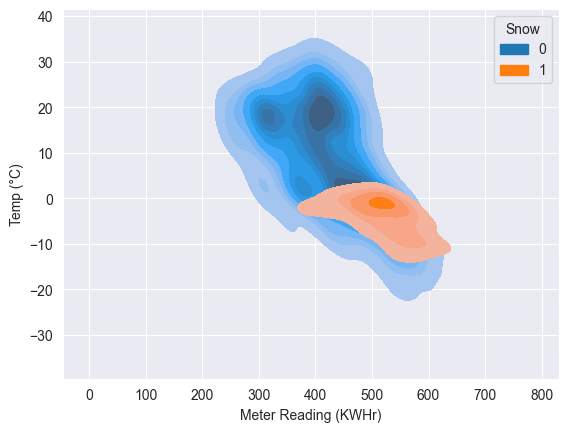

In [21]:
# bivariate analysis with hue
sns.set_style('darkgrid')
sns.kdeplot(data=df, x="Meter Reading (KWHr)", y="Temp (°C)", hue="Snow", fill=True)

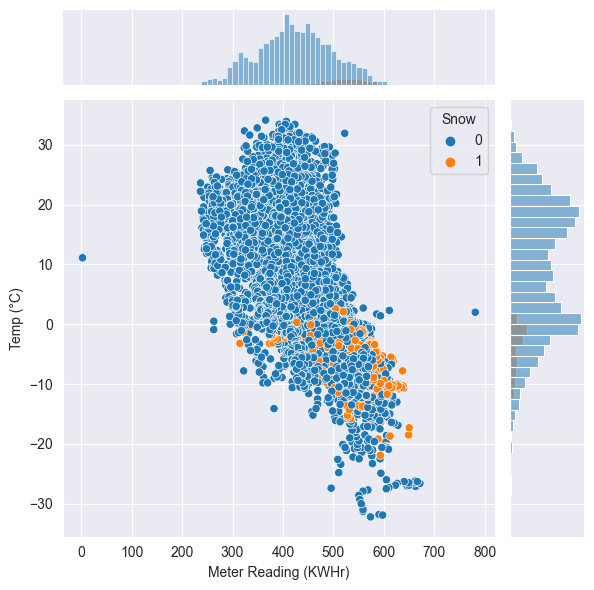

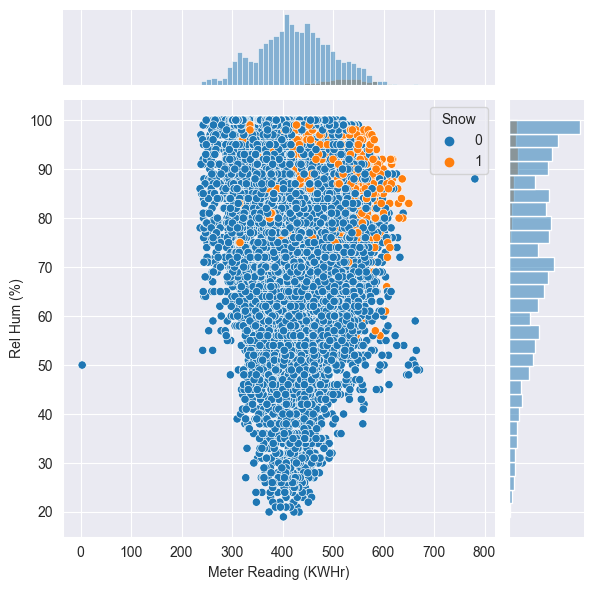

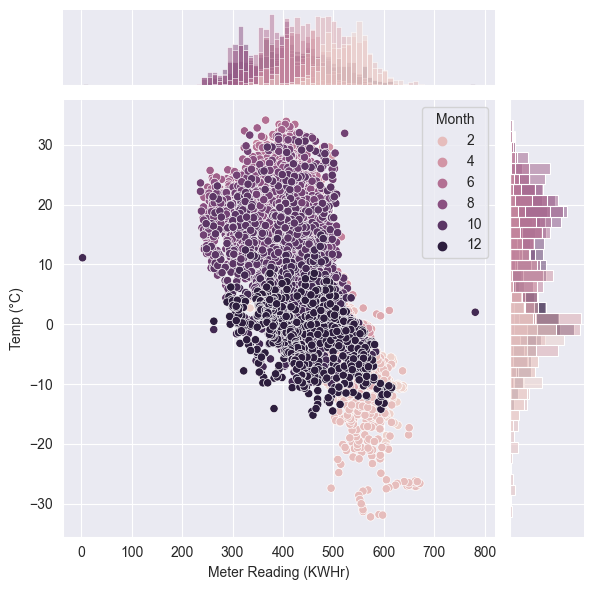

In [9]:
# univariate and bivariate analysis with frequency distributions either marginal or w.r.t to a third categorical variable
sns.set_style('darkgrid')
g = sns.JointGrid(data=df, x="Meter Reading (KWHr)", y="Temp (°C)", hue="Snow")
g.plot(sns.scatterplot, sns.histplot)

# univariate and bivariate analysis with frequency distributions either marginal or w.r.t to a third categorical variable
sns.set_style('darkgrid')
g = sns.JointGrid(data=df, x="Meter Reading (KWHr)", y="Rel Hum (%)", hue="Snow")
g.plot(sns.scatterplot, sns.histplot)

sns.set_style('darkgrid')
g = sns.JointGrid(data=df, x="Meter Reading (KWHr)", y="Temp (°C)", hue="Month")
g.plot(sns.scatterplot, sns.histplot)

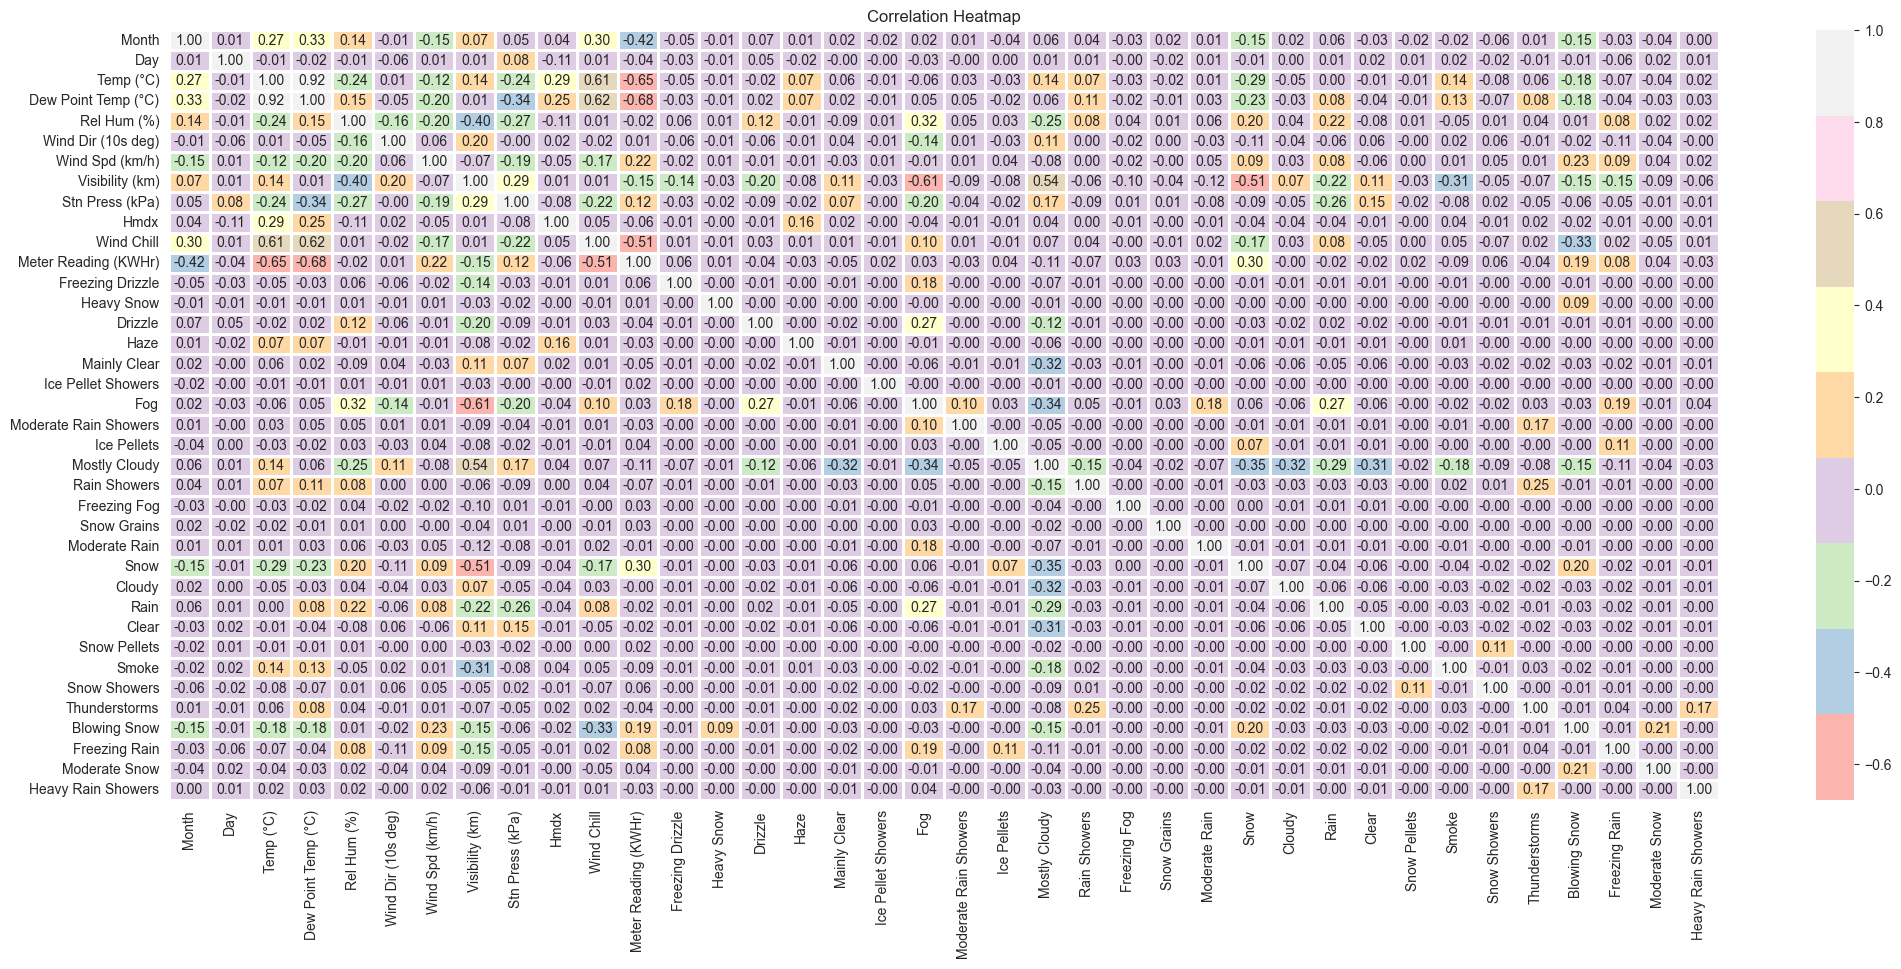

In [42]:
# multivariate correlation between all variables
plt.figure(figsize=(25, 25))
# possible cmaps: Pastel2
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Pastel1', linewidths=2)
plt.title('Correlation Heatmap')
plt.show()

C:\Users\edwin\all_env1\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


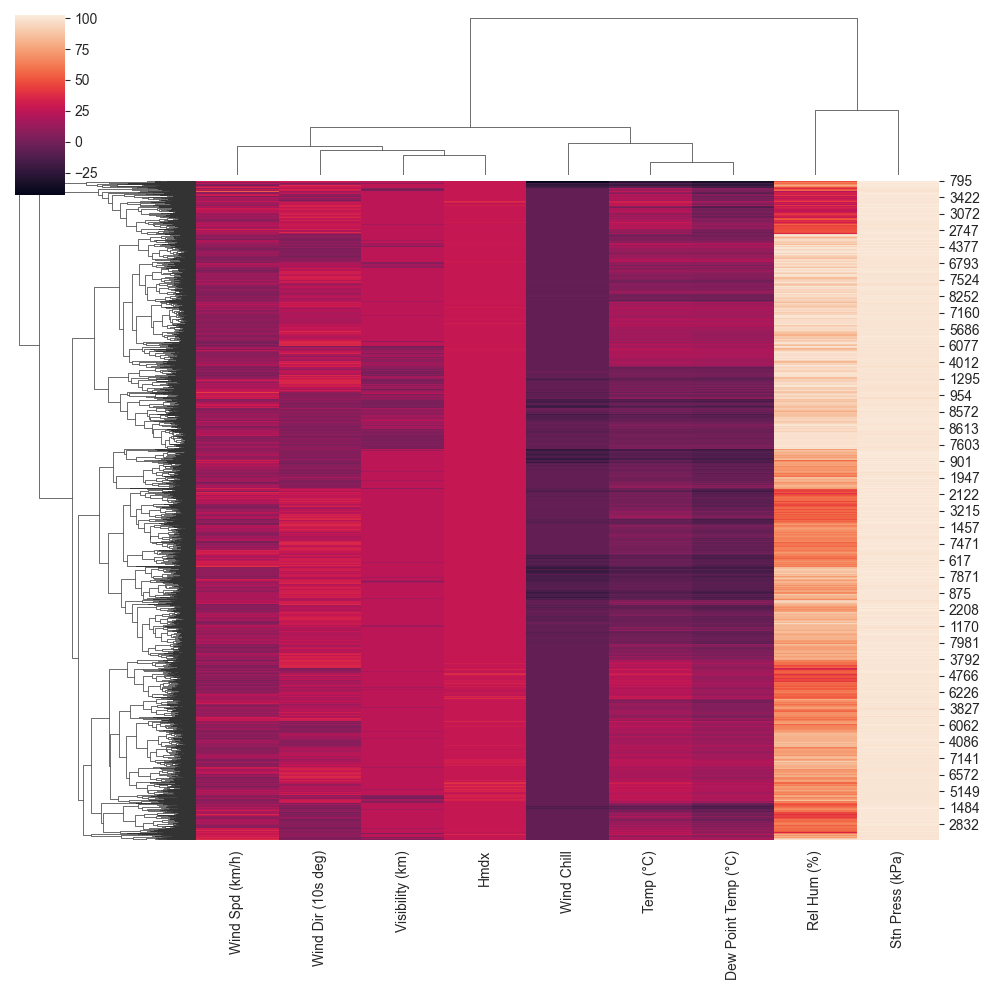

In [49]:
# dendrogram is based on computing distances between instances that are identified by their features.. so for row dendrogram, the features rows are features for the instances..
# for column dendrogram the instances are considered as columns
# the heatmap is the value of the feature..
# the indices on the y-axis are different due to dendrogram clustering, similar clusters are grouped together, changing the instance order..
df_clustermap = df[["Temp (°C)","Dew Point Temp (°C)","Rel Hum (%)","Wind Dir (10s deg)","Wind Spd (km/h)","Visibility (km)","Stn Press (kPa)","Hmdx","Wind Chill"]]
sns.clustermap(df_clustermap)

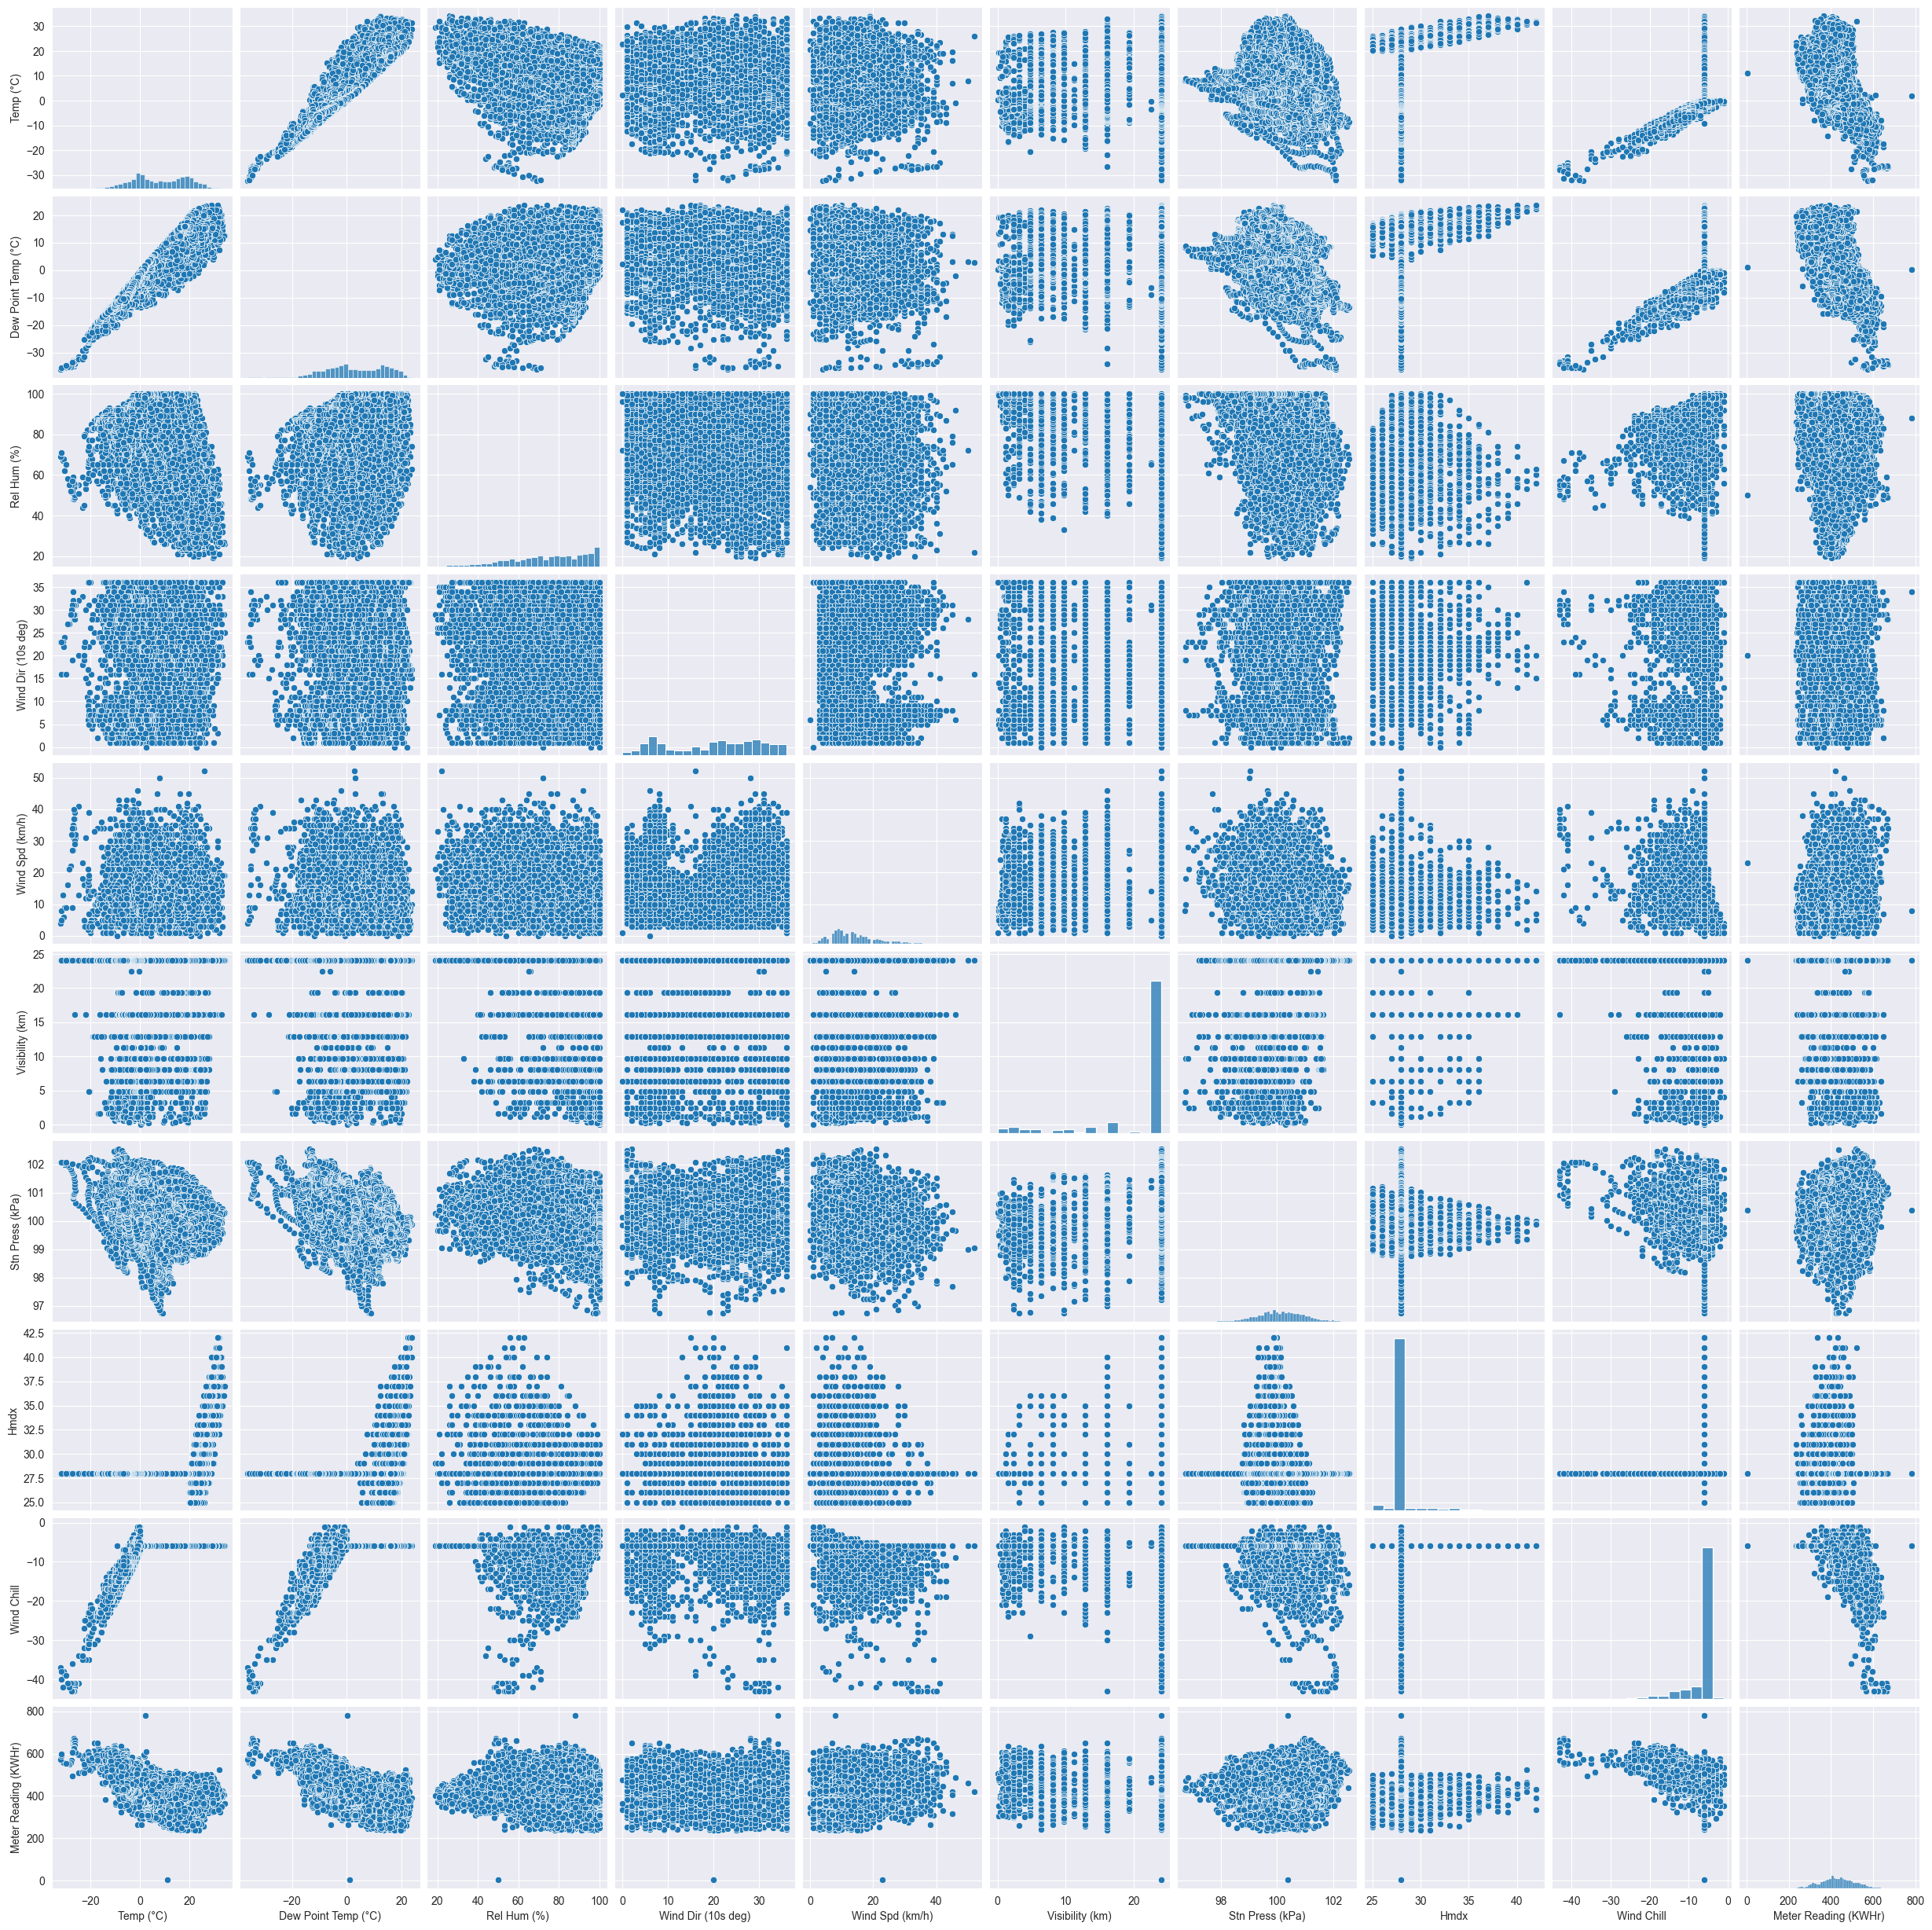

In [11]:
# pair plots for all bivariate distributions among all pairs of features
df_subset = df[["Temp (°C)","Dew Point Temp (°C)","Rel Hum (%)","Wind Dir (10s deg)","Wind Spd (km/h)","Visibility (km)","Stn Press (kPa)","Hmdx","Wind Chill","Meter Reading (KWHr)"]]
sns.pairplot(df_subset)